<a href="https://colab.research.google.com/github/Indian1999/klaszterezes/blob/main/Klaszterez%C3%A9s_szombat13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("Mall_Customers.csv", sep = ",")
data.rename(columns={"Annual Income (k$)": "Annual_Income", "Spending Score (1-100)": "Spending_Score"}, inplace = True)
data.head()

In [3]:
x_kmeans = data[['Age', 'Annual_Income', 'Spending_Score']]

In [ ]:
print(x_kmeans.isna().sum())

In [ ]:
plt.figure(figsize=(4,4))
df = pd.DataFrame(x_kmeans, columns=x_kmeans.columns)
cm = df.corr()
sns.heatmap(cm, annot = True)

In [ ]:
from sklearn.cluster import KMeans
errors = []
k_values = range(2, 21)
for k in k_values:
  km = KMeans(n_clusters=k, random_state=0)
  km.fit(x_kmeans)
  errors.append(km.inertia_)


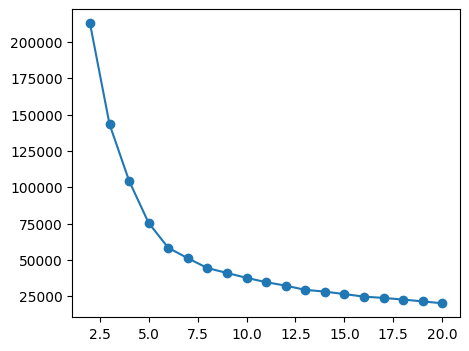

In [7]:
plt.figure(figsize=(5,4))
plt.plot(k_values, errors, marker="o")

In [13]:
km = KMeans(n_clusters=5, random_state=0).fit(x_kmeans)
labels = km.labels_
#print(labels)
x_kmeans["labels"] = labels
data["kmeans_labels"] = labels
data.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-13-6421099c1832>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_kmeans["labels"] = labels


,CustomerID,Gender,Age,Annual_Income,Spending_Score,kmeans_labels
0,1,Male,19,15,39,0
1,2,Male,21,15,81,4
2,3,Female,20,16,6,0
3,4,Female,23,16,77,4
4,5,Female,31,17,40,0


In [ ]:
sns.countplot(data=data, x="kmeans_labels", hue = "Gender")
plt.title("Gender distribution in different clusters")
plt.show()

In [ ]:
import plotly.express as px
fig = px.scatter_3d(data, x="Age", y = "Annual_Income", z="Spending_Score", color = "kmeans_labels")
fig.show()

Egyéb módszerek

In [19]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [22]:
x_hier = data[["Age", "Annual_Income", "Spending_Score"]]

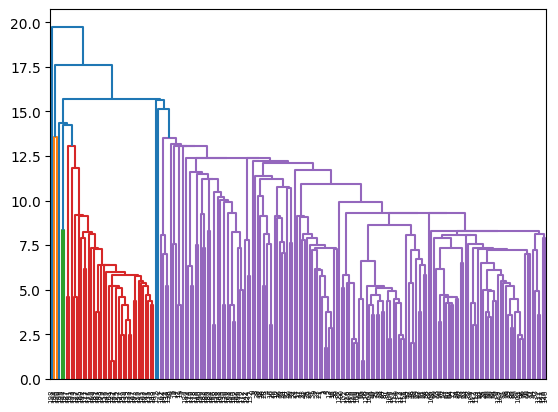

In [25]:
linkage_data = linkage(x_hier, method = "single", metric = "euclidean")
dendrogram(linkage_data)
plt.show()

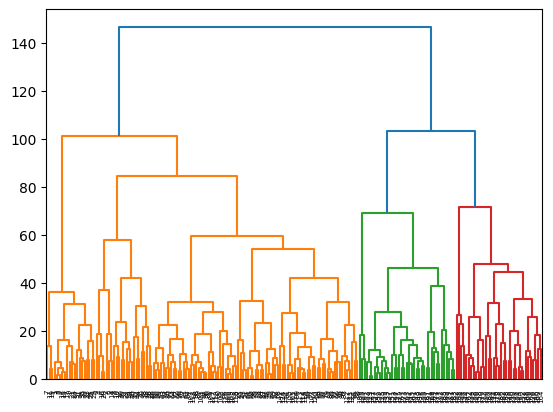

In [26]:
linkage_data = linkage(x_hier, method = "complete", metric = "euclidean")
dendrogram(linkage_data)
plt.show()

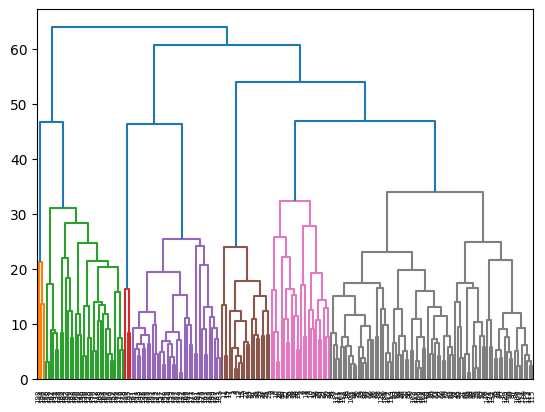

In [27]:
linkage_data = linkage(x_hier, method = "average", metric = "euclidean")
dendrogram(linkage_data)
plt.show()

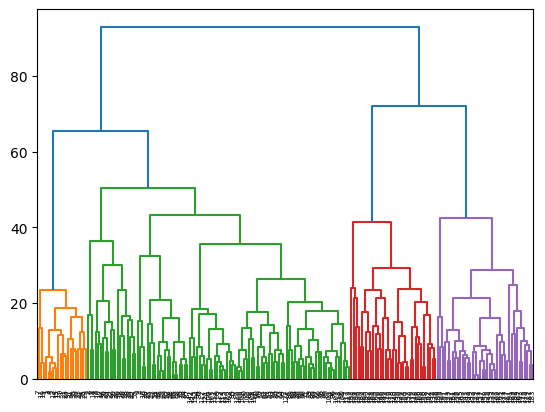

In [28]:
linkage_data = linkage(x_hier, method = "weighted", metric = "euclidean")
dendrogram(linkage_data)
plt.show()

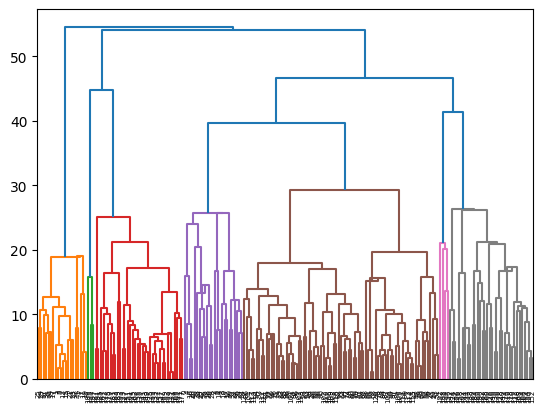

In [29]:
linkage_data = linkage(x_hier, method = "centroid", metric = "euclidean")
dendrogram(linkage_data)
plt.show()

In [ ]:
linkage_data = linkage(x_hier, method = "ward", metric = "euclidean")
dendrogram(linkage_data)
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hier_cluster = AgglomerativeClustering(n_clusters=5, linkage="average", metric="euclidean")
labels = hier_cluster.fit_predict(x_hier)
px.scatter_3d(x_hier, x = "Age", y="Annual_Income", z = "Spending_Score", color = labels)